# Import libraries

In [1]:
%load_ext autoreload
%autoreload
import pandas as pd
import re
import numpy as np
from brand_and_updated_quant import find_company_name, update_quantities
import joblib
from merge_files import merge_ingredients, convert_x2x, str_to_bool
import os

# Convert to xlsx

In [2]:
downloaded_folder = "./Downloads/"

In [3]:
# convert xls to xlsx files
download_directory = os.path.abspath(downloaded_folder)
convert_x2x(download_directory+'/')

Converted "d:\BFC\code\Downloads\1. Acid Ascorbic 1.xls" to "d:\BFC\code\Downloads/1. Acid Ascorbic 1.xlsx"
Converted "d:\BFC\code\Downloads\10. Gluten 1.xls" to "d:\BFC\code\Downloads/10. Gluten 1.xlsx"
Converted "d:\BFC\code\Downloads\11. Gluzyme Fortis BG 1.xls" to "d:\BFC\code\Downloads/11. Gluzyme Fortis BG 1.xlsx"
Converted "d:\BFC\code\Downloads\12. Guar Gum 1.xls" to "d:\BFC\code\Downloads/12. Guar Gum 1.xlsx"
Converted "d:\BFC\code\Downloads\13.  High Fructose Corn Syrup 1.xls" to "d:\BFC\code\Downloads/13.  High Fructose Corn Syrup 1.xlsx"
Converted "d:\BFC\code\Downloads\14. Inositol 1.xls" to "d:\BFC\code\Downloads/14. Inositol 1.xlsx"
Converted "d:\BFC\code\Downloads\15. Inulin 1.xls" to "d:\BFC\code\Downloads/15. Inulin 1.xlsx"
Converted "d:\BFC\code\Downloads\16. Konjac 1.xls" to "d:\BFC\code\Downloads/16. Konjac 1.xlsx"
Converted "d:\BFC\code\Downloads\17. Locust Bean Gum 1.xls" to "d:\BFC\code\Downloads/17. Locust Bean Gum 1.xlsx"
Converted "d:\BFC\code\Downloads\18. M

True

## Merge files

### Merge files and change column names

In [4]:
# export_data = input("Enter True or False: ")
export_data = "False"
try:
    export_data = str_to_bool(export_data)
    print(f"The boolean value is: {export_data}")
except ValueError as e:
    print(e)

The boolean value is: False


In [5]:
df = merge_ingredients(downloaded_folder+"/", export_data=export_data) 
df.head(5)

./Downloads\1. Acid Ascorbic 1.xlsx
./Downloads\10. Gluten 1.xlsx
./Downloads\11. Gluzyme Fortis BG 1.xlsx
./Downloads\12. Guar Gum 1.xlsx
./Downloads\13.  High Fructose Corn Syrup 1.xlsx
./Downloads\14. Inositol 1.xlsx
./Downloads\15. Inulin 1.xlsx
./Downloads\16. Konjac 1.xlsx
./Downloads\17. Locust Bean Gum 1.xlsx
./Downloads\18. Malic Acid 1.xlsx
./Downloads\19. Natural Color 1.xlsx
./Downloads\2. Aspartame 1.xlsx
./Downloads\20. Pectin 1.xlsx
./Downloads\21. Pentasodium Triphosphate 1.xlsx
./Downloads\22. Potassium Chloride 1.xlsx
./Downloads\23. Propylene Glycol Alginate 1.xlsx
./Downloads\24. Sodium Alginate 1.xlsx
./Downloads\25. Sodium Cyclamate 1.xlsx
./Downloads\26. Sodium Erythorbate 1.xlsx
./Downloads\27. Sodium Saccharin 1.xlsx
./Downloads\28. Sodium Stearoyl Lactylate 1.xlsx
./Downloads\29. Sorbate 1.xlsx
./Downloads\3. Beta Cyclodextrin 1.xlsx
./Downloads\30. Soy Protein 1.xlsx
./Downloads\31. Sucralose 1.xlsx
./Downloads\32. Taurine 1.xlsx
./Downloads\33. Trisodium Cit

,Date,Mã_tờ_khai,Công_ty_nhập,Công_ty_nhập (TA),Địa_chỉ,Mã_số_thuế,Nhà_cung_cấp,Địa_chỉ_(ncc),Quốc_gia_xuất_xứ,Mã_nước_xuất_khẩu,...,海关代理代码,Cảng xuất,起运港代码,Cảng nhập,目的港代码,原产国,原产国家代码,承运人,追踪号,Sản phẩm
0,2024-10-09,106634957810,CÔNG TY TNHH BRENNTAG VIỆT NAM,BRENNTAG VIETNAM COMPANY LIMITED,"120 Hoàng Hoa Thám, Phường 7, Quận Bình Thạnh,...",0310474190,RIKEVITA SINGAPORE PTE LTD,"41 SCIENCE PARK ROAD, #02-01, THE GEMINI, SING...",Malaysia,NaN,...,CCHQDTHCM,NaN,NaN,NaN,NaN,MALAYSIA,MY,NaN,NaN,Acid Ascorbic
1,2024-10-04,106624821221,CÔNG TY TNHH BRENNTAG VIỆT NAM,BRENNTAG VIETNAM COMPANY LIMITED,"120 Hoàng Hoa Thám, Phường 7, Quận Bình Thạnh,...",0310474190,RIKEVITA M SDN BHD,"NO 11 JALAN BAYU, TAMPOI, JOHOR BAHRU, MALYSIA...",Malaysia,NaN,...,CPNHANHHCM,NaN,NaN,NaN,NaN,MALAYSIA,MY,NaN,NaN,Acid Ascorbic
2,2024-10-31,106690120610,CÔNG TY CỔ PHẦN CHĂN NUÔI C P VIỆT NAM CHI NHÁ...,CONG TY CP CHAN NUOI C P VIET NAM CN DONG LANH...,"Lô A21 đến A35, Khu Công Nghiêp An Hiệp, X.An ...",3600224423078,FOOD COATINGS INTERNATIONAL LIMITED,"2/9 MOO 3 BANGNA-TRAD ROAD, BANGSAOTHONG., SAM...",Thailand,NaN,...,BENTRELA,NaN,NaN,NaN,NaN,THAILAND,TH,NaN,NaN,Gluten
3,2024-10-31,106690120610,CÔNG TY CỔ PHẦN CHĂN NUÔI C P VIỆT NAM CHI NHÁ...,CONG TY CP CHAN NUOI C P VIET NAM CN DONG LANH...,"Lô A21 đến A35, Khu Công Nghiêp An Hiệp, X.An ...",3600224423078,FOOD COATINGS INTERNATIONAL LIMITED,"2/9 MOO 3 BANGNA-TRAD ROAD, BANGSAOTHONG., SAM...",Thailand,NaN,...,BENTRELA,NaN,NaN,NaN,NaN,THAILAND,TH,NaN,NaN,Gluten
4,2024-10-31,106690727250,CÔNG TY CỔ PHẦN HÓA CHẤT Á CHÂU,ASIA CHEMICAL CORPORATION,"Lô K4B khu công nghiệp Lê Minh Xuân, Đường Số ...",0304918352,GUANXIAN RUICHANG TRADING CO LTD,"GUANXIAN INDUSTRIAL ZONE, SHANDONG PROVINCE, C...",China,NaN,...,CSGONKVI,NaN,NaN,NaN,NaN,CHINA,CN,NaN,NaN,Gluten


In [6]:
df.shape

(3037, 39)

In [7]:
df_to_clean =df.copy()
df_to_clean.head(5)

,Date,Mã_tờ_khai,Công_ty_nhập,Công_ty_nhập (TA),Địa_chỉ,Mã_số_thuế,Nhà_cung_cấp,Địa_chỉ_(ncc),Quốc_gia_xuất_xứ,Mã_nước_xuất_khẩu,...,海关代理代码,Cảng xuất,起运港代码,Cảng nhập,目的港代码,原产国,原产国家代码,承运人,追踪号,Sản phẩm
0,2024-10-09,106634957810,CÔNG TY TNHH BRENNTAG VIỆT NAM,BRENNTAG VIETNAM COMPANY LIMITED,"120 Hoàng Hoa Thám, Phường 7, Quận Bình Thạnh,...",0310474190,RIKEVITA SINGAPORE PTE LTD,"41 SCIENCE PARK ROAD, #02-01, THE GEMINI, SING...",Malaysia,NaN,...,CCHQDTHCM,NaN,NaN,NaN,NaN,MALAYSIA,MY,NaN,NaN,Acid Ascorbic
1,2024-10-04,106624821221,CÔNG TY TNHH BRENNTAG VIỆT NAM,BRENNTAG VIETNAM COMPANY LIMITED,"120 Hoàng Hoa Thám, Phường 7, Quận Bình Thạnh,...",0310474190,RIKEVITA M SDN BHD,"NO 11 JALAN BAYU, TAMPOI, JOHOR BAHRU, MALYSIA...",Malaysia,NaN,...,CPNHANHHCM,NaN,NaN,NaN,NaN,MALAYSIA,MY,NaN,NaN,Acid Ascorbic
2,2024-10-31,106690120610,CÔNG TY CỔ PHẦN CHĂN NUÔI C P VIỆT NAM CHI NHÁ...,CONG TY CP CHAN NUOI C P VIET NAM CN DONG LANH...,"Lô A21 đến A35, Khu Công Nghiêp An Hiệp, X.An ...",3600224423078,FOOD COATINGS INTERNATIONAL LIMITED,"2/9 MOO 3 BANGNA-TRAD ROAD, BANGSAOTHONG., SAM...",Thailand,NaN,...,BENTRELA,NaN,NaN,NaN,NaN,THAILAND,TH,NaN,NaN,Gluten
3,2024-10-31,106690120610,CÔNG TY CỔ PHẦN CHĂN NUÔI C P VIỆT NAM CHI NHÁ...,CONG TY CP CHAN NUOI C P VIET NAM CN DONG LANH...,"Lô A21 đến A35, Khu Công Nghiêp An Hiệp, X.An ...",3600224423078,FOOD COATINGS INTERNATIONAL LIMITED,"2/9 MOO 3 BANGNA-TRAD ROAD, BANGSAOTHONG., SAM...",Thailand,NaN,...,BENTRELA,NaN,NaN,NaN,NaN,THAILAND,TH,NaN,NaN,Gluten
4,2024-10-31,106690727250,CÔNG TY CỔ PHẦN HÓA CHẤT Á CHÂU,ASIA CHEMICAL CORPORATION,"Lô K4B khu công nghiệp Lê Minh Xuân, Đường Số ...",0304918352,GUANXIAN RUICHANG TRADING CO LTD,"GUANXIAN INDUSTRIAL ZONE, SHANDONG PROVINCE, C...",China,NaN,...,CSGONKVI,NaN,NaN,NaN,NaN,CHINA,CN,NaN,NaN,Gluten


# Add day, month, year

In [8]:
# Convert the 'Date' column to datetime if it's not already
df_to_clean['Date'] = pd.to_datetime(df_to_clean['Date'], format='%Y-%m-%d')

# Extract day, month, and year into separate columns
df_to_clean['Day'] = df_to_clean['Date'].dt.day
df_to_clean['Month'] = df_to_clean['Date'].dt.month
df_to_clean['Year'] = df_to_clean['Date'].dt.year

df_to_clean.insert(df_to_clean.columns.get_loc('Date')+1, 'Day', df_to_clean.pop('Day'))
df_to_clean.insert(df_to_clean.columns.get_loc('Date')+2, 'Month', df_to_clean.pop('Month'))
df_to_clean.insert(df_to_clean.columns.get_loc('Date')+3, 'Year', df_to_clean.pop('Year'))

# Check Duplicate

In [9]:
# Assuming 'Mã_tờ_khai 11 số' is a string column
df_to_clean['Mã_tờ_khai 11 số'] = df_to_clean['Mã_tờ_khai'].astype(str).str[:11] + df_to_clean['Số_lượng'].astype(str) + df_to_clean['Thành_tiền'].astype(str)


# Create a boolean mask for duplicated rows
duplicated_rows = df_to_clean.duplicated(subset='Mã_tờ_khai 11 số', keep='first')

# Update 'Duplicated_MTK' column for rows beyond the first occurrence
df_to_clean['is_duplicated'] = duplicated_rows.astype(int)
df_to_clean = df_to_clean.drop(['Mã_tờ_khai 11 số'], axis=1)

# Update the first occurrence as 0
df_to_clean.loc[duplicated_rows, 'is_duplicated'] = 1
# df.to_excel("{}/{} {} renamed.xlsx".format(chat, chat, time), index=False, header=True)

# Updated Quantity, Price, Brand

In [10]:
# Calculate mode of 'Đơn_giá'

# Define a function to apply
def calculate_updated_đơn_giá(row, data_for_valid):
    mode_đơn_giá = data_for_valid['Đơn_giá'].mode().iloc[0]  # Get the first mode if there are multiple
    # Generate random values where Updated_Số_lượng is 0
    test = np.random.uniform(mode_đơn_giá - 1.2, mode_đơn_giá + 1.2)

    if row['Updated_Số_lượng'] != 0:
        return row['Thành_tiền'] / row['Updated_Số_lượng']
    else:
        return test
    
def extract_after_keywords(text):
    keywords = ["tổng hợp","quốc tế","dịch vụ","thương mại", "TM", "sản xuất", "cổ phần", "MTV", "một thành viên" "TNHH", "trách nhiệm hữu hạn"]
    
    # Convert text to lowercase for case-insensitive search
    text_lower = text.lower()
    if text_lower.find("nhà ga"):
        keywords.pop(0)
    for keyword in keywords:
        keyword_lower = keyword.lower()
        if keyword_lower in text_lower:
            start_index = text_lower.find(keyword_lower) + len(keyword_lower)
            text[start_index:].strip().replace("XUẤT NHẬP KHẨU", "XNK")
            return text[start_index:].strip()
    
    return text # Return None if none of the keywords are found

# Example usage
text = "Công ty TNHH nhà ga quốc tế ABC"
result = extract_after_keywords(text)
print(result)  # Output: "ABC"


ABC


In [11]:
# make a safepoint
data_for_valid = df_to_clean.copy()

# data_for_valid['Hợp_lệ'] = data_for_valid['Hợp_lệ'].map({1: "có", 0: "không"})

# data_for_valid = valid_df.copy()
data_for_valid['Brand'] = data_for_valid['Mô_tả_sản_phẩm'].apply(find_company_name)
data_for_valid.insert(data_for_valid.columns.get_loc('Mô_tả_sản_phẩm') + 1, 'Brand', data_for_valid.pop('Brand'))

# them cot update so luong va don vi
data_for_valid['Updated_Số_lượng'] = data_for_valid.apply(update_quantities, axis=1)
data_for_valid['Updated_Đơn_vị'] = ["kilogram"] * len(data_for_valid)
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 1, 'Updated_Số_lượng', data_for_valid.pop('Updated_Số_lượng'))
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 2, 'Updated_Đơn_vị', data_for_valid.pop('Updated_Đơn_vị'))

data_for_valid['Updated_Đơn_giá'] = data_for_valid.apply(lambda row: calculate_updated_đơn_giá(row, data_for_valid), axis=1)
data_for_valid.insert(data_for_valid.columns.get_loc('Đơn_giá'), 'Updated_Đơn_giá', data_for_valid.pop('Updated_Đơn_giá'))

# vlookup phan loai thi trg
# import file fim market
df_marketclass = pd.read_excel('../Data/Data for fill data/Updated dim_company_marketType.xlsx',
                               sheet_name="phân loại thị trường")

if export_data == False:
    company = 'Công_ty_nhập'
    parent_company = 'Công ty nhập gộp'
else:
    company = 'Nhà_cung_cấp'
    parent_company = 'Nhà cung cấp gộp'

lookup_data = data_for_valid[company]
lookup_data.name = company

result_df = pd.merge(lookup_data, df_marketclass, on='Công_ty_nhập', how='left')
# Setting the index of df1 equal to the index of df2
result_df = result_df.set_index(data_for_valid.index)

comp_nice_name = company.lower().replace('_', " ")
data_for_valid['MarketClassification'] = result_df['MarketClassification']
data_for_valid[f'Phân loại {comp_nice_name}'] = result_df['Phân loại công ty nhập']
data_for_valid[parent_company] = result_df['Công ty nhập gộp']
data_for_valid.insert(data_for_valid.columns.get_loc(company) + 1, parent_company, data_for_valid.pop(parent_company))

## Adding to blank CTN gop

In [12]:
# Apply the function to fill in the 'Công ty nhập gộp' column
data_for_valid[parent_company] = data_for_valid[parent_company].fillna(
    data_for_valid[company].apply(extract_after_keywords)
)

## Tuning price

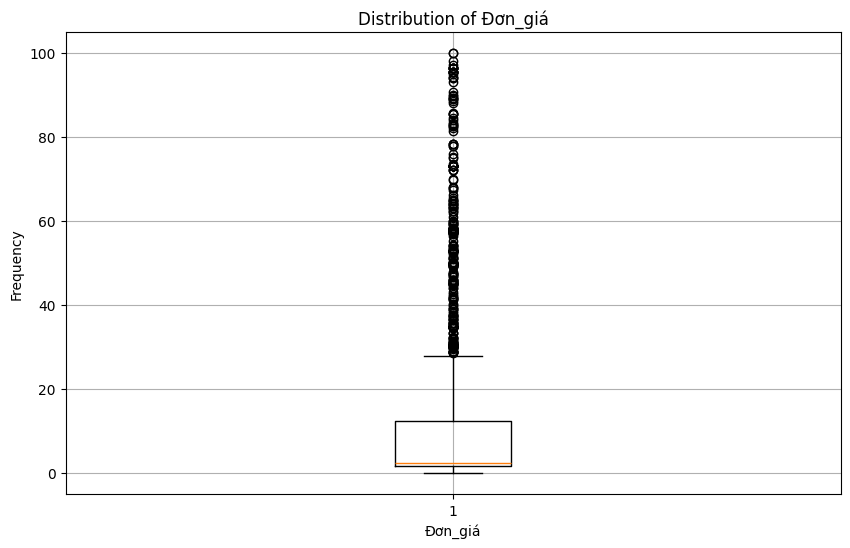

In [13]:
import matplotlib.pyplot as plt
test =data_for_valid[data_for_valid['Updated_Đơn_giá']<100]

# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))
plt.boxplot(test['Updated_Đơn_giá'])
plt.title('Distribution of Đơn_giá')
plt.xlabel('Đơn_giá')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:
print(data_for_valid['Updated_Đơn_giá'].mode().iloc[0])
print(data_for_valid['Updated_Đơn_giá']) 

1.9
0        2.70
1        2.70
2        2.77
3        2.70
4        1.22
        ...  
3032    47.50
3033     1.90
3034    36.59
3035     4.50
3036    42.00
Name: Updated_Đơn_giá, Length: 3037, dtype: float64


In [15]:
mode_đơn_giá = data_for_valid['Updated_Đơn_giá'].mode().iloc[0]  # Get the first mode if there are multiple
price_upperbound = data_for_valid['Updated_Đơn_giá'].quantile(0.8)
price_lowerbound = data_for_valid['Updated_Đơn_giá'].quantile(0.05)
print(price_upperbound)
print(price_lowerbound)

49.69912
0.283


In [16]:
# Calculate mode of 'Đơn_giá'

# Define a function to apply

def calculate_updated_đơn_giá(row):
    # Generate random values where Updated_Số_lượng is 0
    mode_đơn_giá = np.random.uniform(price_lowerbound+0.5, price_upperbound)

    if row['Updated_Đơn_giá'] > price_upperbound+1:
        return mode_đơn_giá
    elif row['Updated_Đơn_giá'] < price_lowerbound:
        return mode_đơn_giá
    else:
        return row['Updated_Đơn_giá']
        

data_for_valid['Updated_Đơn_giá'] = data_for_valid.apply(lambda row: calculate_updated_đơn_giá(row), axis=1)
# data_for_valid.insert(data_for_valid.columns.get_loc('Đơn_giá'), 'Updated_Đơn_giá', data_for_valid.pop('Updated_Đơn_giá'))

In [17]:
data_for_valid['Updated_Đơn_giá']

0        2.70
1        2.70
2        2.77
3        2.70
4        1.22
        ...  
3032    47.50
3033     1.90
3034    36.59
3035     4.50
3036    42.00
Name: Updated_Đơn_giá, Length: 3037, dtype: float64

In [18]:
# newFileName = input("Enter file name: ")
newFileName = "Danh sach cac chat thang 10"

In [19]:
data_for_valid.to_excel(f"merged_files_unclean/{newFileName}.xlsx", index=False, header=True, sheet_name="Data")

## Process Hop_le

In [20]:
def custom_preprocessor(text):
    # Remove non-alphabetic characters, keeping both English and Vietnamese alphabets
    text = re.sub("[^a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễđìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹ]", " ", text)
    # Remove specified words
    exclusion_list = []

    # Remove weight units
    weight_units = ["kilogram","kilograms","kg","kgs","kgm","kgms","gm","gms","g", "gram", "grams", "ml",
                    "lb", "pound", "pounds", "oz", "ounce", "ounces", "unit", "units","pce","ton","cubic meter",
                    "tne","ton","milligram","mg","microgram","µg","metric ton","tonne","stone","st","cara","car",
                    "ct","grain","gr","pce", 'lit']
    exclusion_list += weight_units
    
    text = " ".join(word for word in text.split() if word.lower() not in exclusion_list)
    return text

### Option San pham, description column

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.load_model('./Model AI/ingre_w_all_CatBoosting_model')

tfidf_vectorizer = joblib.load('./Model AI/ingre_w_all_fidf_vectorizer.joblib')
tfidf_vectorizer.preprocessor = custom_preprocessor  # Set the custom preprocessor

# create validity column
data_for_valid['Mô_tả_sản_phẩm'] = data_for_valid['Mô_tả_sản_phẩm'].str.lower()
product_des = tfidf_vectorizer.transform(data_for_valid["Mô_tả_sản_phẩm"]).toarray()
ingre = data_for_valid['Sản phẩm'].astype(str).fillna('NaN').values.reshape(-1,1)

# price = data_for_valid['Thành_tiền'].values.reshape(-1,1)
# X_new = np.concatenate((price, ingre, product_des), axis=1)
X_new = np.concatenate((ingre, product_des), axis=1)


data_for_valid['Hợp_lệ'] = classifier.predict(X_new)
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 1, 'Hợp_lệ', data_for_valid.pop('Hợp_lệ'))

c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Option Price, quantity, description column

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
# classifier.load_model('quantity_w_huong_CatBoosting_model')
classifier.load_model('./Model AI/price_w_all_ingredients_CatBoosting_model')

# tfidf_vectorizer = joblib.load('quantity_w_huong_tfidf_vectorizer.joblib')
tfidf_vectorizer = joblib.load('./Model AI/price_w_all_ingredients_tfidf_vectorizer.joblib')

tfidf_vectorizer.preprocessor = custom_preprocessor  # Set the custom preprocessor

# create validity column
data_for_valid['Mô_tả_sản_phẩm'] = data_for_valid['Mô_tả_sản_phẩm'].str.lower()
product_des = tfidf_vectorizer.transform(data_for_valid["Mô_tả_sản_phẩm"]).toarray()

quantity = data_for_valid['Số_lượng'].values.reshape(-1,1)
X_new = np.concatenate((quantity, product_des), axis=1)
# price = data_for_valid['Thành_tiền'].values.reshape(-1,1)
# X_new = np.concatenate((price, product_des), axis=1)


data_for_valid['Hợp_lệ'] = classifier.predict(X_new)
data_for_valid.insert(data_for_valid.columns.get_loc('Brand') + 1, 'Hợp_lệ', data_for_valid.pop('Hợp_lệ'))

c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Doan Duy Thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [23]:
cleaned_name = "Danh sach cac chat thang 10"

In [24]:
# Sort the merged DataFrame based on the original index
merged_df = data_for_valid.sort_index()
merged_df

,Date,Day,Month,Year,Mã_tờ_khai,Công_ty_nhập,Công ty nhập gộp,Công_ty_nhập (TA),Địa_chỉ,Mã_số_thuế,...,Cảng nhập,目的港代码,原产国,原产国家代码,承运人,追踪号,Sản phẩm,is_duplicated,MarketClassification,Phân loại công ty nhập
0,2024-10-09,9,10,2024,106634957810,CÔNG TY TNHH BRENNTAG VIỆT NAM,BRENNTAG VIỆT NAM,BRENNTAG VIETNAM COMPANY LIMITED,"120 Hoàng Hoa Thám, Phường 7, Quận Bình Thạnh,...",0310474190,...,NaN,NaN,MALAYSIA,MY,NaN,NaN,Acid Ascorbic,0,đối thủ cạnh tranh trực tiếp,Thương mại
1,2024-10-04,4,10,2024,106624821221,CÔNG TY TNHH BRENNTAG VIỆT NAM,BRENNTAG VIỆT NAM,BRENNTAG VIETNAM COMPANY LIMITED,"120 Hoàng Hoa Thám, Phường 7, Quận Bình Thạnh,...",0310474190,...,NaN,NaN,MALAYSIA,MY,NaN,NaN,Acid Ascorbic,0,đối thủ cạnh tranh trực tiếp,Thương mại
2,2024-10-31,31,10,2024,106690120610,CÔNG TY CỔ PHẦN CHĂN NUÔI C P VIỆT NAM CHI NHÁ...,CHĂN NUÔI C P VIỆT NAM CHI NHÁNH ĐÔNG LẠNH BẾN...,CONG TY CP CHAN NUOI C P VIET NAM CN DONG LANH...,"Lô A21 đến A35, Khu Công Nghiêp An Hiệp, X.An ...",3600224423078,...,NaN,NaN,THAILAND,TH,NaN,NaN,Gluten,0,NaN,NaN
3,2024-10-31,31,10,2024,106690120610,CÔNG TY CỔ PHẦN CHĂN NUÔI C P VIỆT NAM CHI NHÁ...,CHĂN NUÔI C P VIỆT NAM CHI NHÁNH ĐÔNG LẠNH BẾN...,CONG TY CP CHAN NUOI C P VIET NAM CN DONG LANH...,"Lô A21 đến A35, Khu Công Nghiêp An Hiệp, X.An ...",3600224423078,...,NaN,NaN,THAILAND,TH,NaN,NaN,Gluten,0,NaN,NaN
4,2024-10-31,31,10,2024,106690727250,CÔNG TY CỔ PHẦN HÓA CHẤT Á CHÂU,HÓA CHẤT Á CHÂU,ASIA CHEMICAL CORPORATION,"Lô K4B khu công nghiệp Lê Minh Xuân, Đường Số ...",0304918352,...,NaN,NaN,CHINA,CN,NaN,NaN,Gluten,0,đối thủ cạnh tranh trực tiếp,Thương mại
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,2024-10-01,1,10,2024,106600835940,CÔNG TY TNHH HÓA CHẤT BÊ TA,HÓA CHẤT BÊ TA,BETA CHEMICALS COMPANY LIMITED,"308/32 Bình Lợi, Phường 13, Quận Bình Thạnh, T...",0304214927,...,NaN,NaN,POLAND,PL,NaN,NaN,Gelatin,0,đối thủ cạnh tranh trực tiếp,Thương mại
3033,2024-10-01,1,10,2024,106614381311,CÔNG TY TNHH MỘT THÀNH VIÊN XUẤT NHẬP KHẨU HÀ VY,HÀ VY,HA VY IMPORT AND EXPORT COMPANY LIMITED,"Số 044 Mạc Đĩnh Chi, Phường Lào Cai, Thành phố...",5300782773,...,NaN,NaN,CHINA,CN,NaN,NaN,Gelatin,1,chưa khai phá,Thương mại
3034,2024-10-22,22,10,2024,106663085320,CÔNG TY TNHH MERCK VIỆT NAM,MERCK VIỆT NAM,MERCK VIETNAM COMPANY,"Tòa nhà CentrePoint, Số 106, Đường Nguyễn Văn ...",0309785593,...,NaN,NaN,GERMANY,DE,NaN,NaN,Glucose Oxidase,0,chưa khai phá,Thương mại
3035,2024-10-14,14,10,2024,106643647242,CÔNG TY TNHH THƯƠNG MẠI VÀ ĐẦU TƯ PHÚ MINH,VÀ ĐẦU TƯ PHÚ MINH,PHU MINH INVESTMENT AND TRADING COMPANY LIMITED,"Xóm 7B, Thôn Yên Ngưu, Xã Tam Hiệp, Huyện Than...",0109237688,...,NaN,NaN,CHINA,CN,NaN,NaN,Glucose Oxidase,0,NaN,NaN


In [25]:
# tạo file mới
columns_to_select = [
    'Day', 'Month', 'Year', 'Mã_tờ_khai', 'Công_ty_nhập', 'Công ty nhập gộp', 
    'Công_ty_nhập (TA)', 'Địa_chỉ', 'Mã_số_thuế', 'Nhà_cung_cấp', 'Địa_chỉ_(ncc)', 
    'Quốc_gia_xuất_xứ', 'HScode', 'Mô_tả_sản_phẩm', 'Brand', 'Hợp_lệ', 
    'Updated_Số_lượng', 'Updated_Đơn_vị', 'Số_lượng', 'Đơn_vị', 'Khối_lượng', 
    'Thành_tiền', 'Tiền_tệ', 'Updated_Đơn_giá', 'Đơn_giá', 'Tỷ giá', 
    'Điều_kiện_giao_hàng', 'Cảng xuất', 'Cảng nhập', 'MarketClassification', 
    'Phân loại công ty nhập', 'is_duplicated', 'Sản phẩm'
]

new_column_names = [
    'Day', 'Month', 'Year', 'Mã tờ khai', 'Công ty nhập', 'Công ty nhập gộp', 
    'Công ty nhập (TA)', 'Địa chỉ', 'Mã số thuế', 'Nhà cung cấp', 'Địa chỉ (ncc)', 
    'Quốc gia xuất xứ', 'HScode', 'Mô tả sản phẩm', 'Thương hiệu', 'Hợp lệ', 
    'updated Số lượng', 'updated Đơn vị', 'Số lượng', 'Đơn vị', 'Khối lượng', 
    'Thành tiền', 'Tiền tệ', 'Updated Đơn giá', 'Đơn giá', 'Tỷ giá', 
    'Điều kiện giao hàng', 'Cảng xuất', 'Cảng nhập', 'Phân loại thị trường', 
    'Phân loại công ty nhập', 'is duplicate', 'Sản phẩm'
]

selected_columns_df = merged_df[columns_to_select]
selected_columns_df.columns = new_column_names
selected_columns_df.to_excel(f"../Data/data final/Data Code Out/{cleaned_name}.xlsx", index=False, header=True, sheet_name="Data")
# selected_columns_df.to_excel(f"../Data/data final/DULIEUTHITRUOGNDAUVAO/cac chat thang 9/{cleaned_name}.xlsx", index=False, header=True, sheet_name="Data")

## End of Cleaning process